In [22]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# need to install squarify first before importing
import squarify

In [23]:
ords = pd.read_csv('D:\Project\RFM\Final_project_RFM\Dataset.csv')
ords.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Unnamed: 12,Unnamed: 13
0,646,CA-2017-126221,12-30-2017,1-5-2018,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN,NaN
1,907,CA-2017-143259,12-30-2017,1-3-2018,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN,NaN
2,908,CA-2017-143259,12-30-2017,1-3-2018,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN,NaN
3,909,CA-2017-143259,12-30-2017,1-3-2018,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN,NaN
4,1297,CA-2017-115427,12-30-2017,1-3-2018,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,NaN,NaN
5,1298,CA-2017-115427,12-30-2017,1-3-2018,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225,NaN,NaN
6,5092,CA-2017-156720,12-30-2017,1-3-2018,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN,NaN
7,1878,CA-2017-118885,12-29-2017,1-2-2018,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611,NaN,NaN
8,1879,CA-2017-118885,12-29-2017,1-2-2018,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326,NaN,NaN
9,2875,US-2017-102638,12-29-2017,12-31-2017,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251,NaN,NaN


In [24]:
ords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       9994 non-null   int64  
 1   Order ID     9994 non-null   object 
 2   Order Date   9994 non-null   object 
 3   Ship Date    9994 non-null   object 
 4   Ship Mode    9994 non-null   object 
 5   Customer ID  9994 non-null   object 
 6   Channel      9994 non-null   object 
 7   Postal Code  9994 non-null   int64  
 8   Product ID   9994 non-null   object 
 9   Sales        9994 non-null   float64
 10  Quantity     9994 non-null   int64  
 11  Unit Cost    9994 non-null   float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [25]:
ords.drop(["Unnamed: 12","Unnamed: 13"], axis=1,inplace = True)
ords.columns = [col.lower().replace(' ', '_') for col in ords.columns]
ords['order_date'] = ords['order_date'].astype('datetime64[ns]')
# ords['order_date'] = ords['order_date'].dt.strftime('%d-%m-%Y')
ords.sample(20)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,channel,postal_code,product_id,sales,quantity,unit_cost
2575,5288,CA-2017-105991,2017-05-05,5-6-2017,First Class,LH-17020,Consumer,80027,FUR-BO-10004467,89.991,3,80.9919
4519,5332,CA-2016-123120,2016-09-04,9-8-2016,Standard Class,CV-12295,Consumer,10011,OFF-BI-10001460,60.600,5,8.0295
9919,3795,US-2014-117163,2014-01-27,2-2-2014,Standard Class,EJ-13720,Consumer,92037,OFF-ST-10003692,57.230,1,42.9225
3283,2290,CA-2017-115154,2017-01-08,1-11-2017,First Class,RS-19420,Corporate,98115,FUR-TA-10001950,892.980,2,406.3059
6039,180,CA-2015-137225,2015-12-15,12-19-2015,Standard Class,JK-15640,Home Office,10009,OFF-AR-10001940,3.280,1,1.8696
4766,7770,CA-2016-155978,2016-08-01,8-1-2016,Same Day,TS-21205,Corporate,92503,TEC-PH-10002885,1039.728,2,474.3759
1371,6490,US-2017-148866,2017-09-19,9-24-2017,Standard Class,JM-15535,Consumer,10011,OFF-PA-10004782,32.400,5,3.3696
2516,8336,CA-2017-161655,2017-05-13,5-18-2017,Second Class,CW-11905,Home Office,19711,OFF-BI-10002082,299.520,9,16.6400
7476,4606,US-2015-113327,2015-05-26,5-29-2015,Second Class,BF-11170,Home Office,28540,TEC-AC-10003628,167.944,7,16.7944
431,210,CA-2017-135860,2017-12-01,12-7-2017,Standard Class,JH-15985,Consumer,48601,OFF-FA-10000134,52.290,9,4.0089


In [44]:
ords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id       9994 non-null   int64         
 1   order_id     9994 non-null   object        
 2   order_date   9994 non-null   datetime64[ns]
 3   ship_date    9994 non-null   object        
 4   ship_mode    9994 non-null   object        
 5   customer_id  9994 non-null   object        
 6   channel      9994 non-null   object        
 7   postal_code  9994 non-null   int64         
 8   product_id   9994 non-null   object        
 9   sales        9994 non-null   float64       
 10  quantity     9994 non-null   int64         
 11  unit_cost    9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 937.1+ KB


In [26]:
groupby_order = ords.groupby(['order_id', 'order_date', 'customer_id'], as_index=False)['sales'].sum()
groupby_order

,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [27]:
rtn = pd.read_csv('D:\Project\RFM\Final_project_RFM\Return.csv')
rtn.columns = [col.lower().replace(' ', '_') for col in rtn.columns]
rtn.tail()

,returned,order_id
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796
295,Yes,CA-2015-149636


In [28]:
rtn_merge = groupby_order.merge(rtn, how='left', on='order_id')
rtn_merge

,order_id,order_date,customer_id,sales,returned
0,CA-2014-100006,2014-09-07,DK-13375,377.970,NaN
1,CA-2014-100090,2014-07-08,EB-13705,699.192,NaN
2,CA-2014-100293,2014-03-14,NF-18475,91.056,NaN
3,CA-2014-100328,2014-01-28,JC-15340,3.928,NaN
4,CA-2014-100363,2014-04-08,JM-15655,21.376,NaN
...,...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368,NaN
5005,US-2017-169320,2017-07-23,LH-16900,171.430,NaN
5006,US-2017-169488,2017-09-07,AA-10375,56.860,NaN
5007,US-2017-169502,2017-08-28,MG-17650,113.410,NaN


In [29]:
yes = rtn_merge[rtn_merge['returned'] == "Yes"]
yes

,order_id,order_date,customer_id,sales,returned
8,CA-2014-100762,2014-11-24,NG-18355,508.620,Yes
10,CA-2014-100867,2014-10-19,EH-14125,321.552,Yes
34,CA-2014-102652,2014-04-06,AY-10555,199.990,Yes
47,CA-2014-103373,2014-05-18,BS-11755,779.796,Yes
55,CA-2014-103744,2014-02-23,MG-17875,11.364,Yes
...,...,...,...,...,...
4887,US-2017-136679,2017-11-14,XP-21865,212.992,Yes
4925,US-2017-147886,2017-03-28,DH-13075,1435.960,Yes
4927,US-2017-147998,2017-05-19,SA-20830,133.120,Yes
4939,US-2017-151127,2017-05-22,RL-19615,49.560,Yes


In [30]:
valid = pd.concat([rtn_merge,yes])
valid = valid.drop_duplicates(keep = False)
valid.drop('returned', axis = 1, inplace = True)
valid


,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [31]:
today = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')

In [32]:
rfm = valid.groupby('customer_id').agg({'order_date': 'max', 'order_id': 'count', 'sales': 'sum'}).reset_index()
rfm.columns = ['customer_id', 'max_date', 'frequency', 'monetary']
rfm['recency'] = (today - rfm['max_date']).dt.days
rfm.drop('max_date', axis=1, inplace = True)
rfm = rfm[['customer_id', 'recency', 'frequency', 'monetary']]
rfm

,customer_id,recency,frequency,monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [33]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=r_labels)
rfm['f_score'] = pd.qcut(rfm['frequency'], q=5, labels=f_labels)
rfm['m_score'] = pd.qcut(rfm['monetary'], q=5, labels=m_labels)

In [34]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score'] = rfm['rfm_score'].astype(int)
rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112


In [35]:
seg = pd.read_csv('D:\Project\RFM\Final_project_RFM\Segmentation.csv')
seg.drop(seg.iloc[:,2:], axis = 1, inplace = True)
seg.columns = [col.lower().replace(' ', '_') for col in seg.columns]
seg

,segment,rfm_score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [36]:
seg['rfm_score'] = seg['rfm_score'].str.split(',')
seg = seg.explode('rfm_score').reset_index(drop=True)
seg['rfm_score'] = seg['rfm_score'].astype(int)
seg.sort_values(by='rfm_score')
seg

,segment,rfm_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [37]:
joined = rfm.merge(seg, how='left', on='rfm_score')
joined

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,5,4,5438.650,5,1,5,515,Promising
788,YS-21880,10,8,6720.444,5,4,5,545,Champions
789,ZC-21910,55,12,7892.998,4,5,5,455,Champions


C:\Users\NGUYEN KHANH\AppData\Local\Temp\ipykernel_8284\1239850904.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


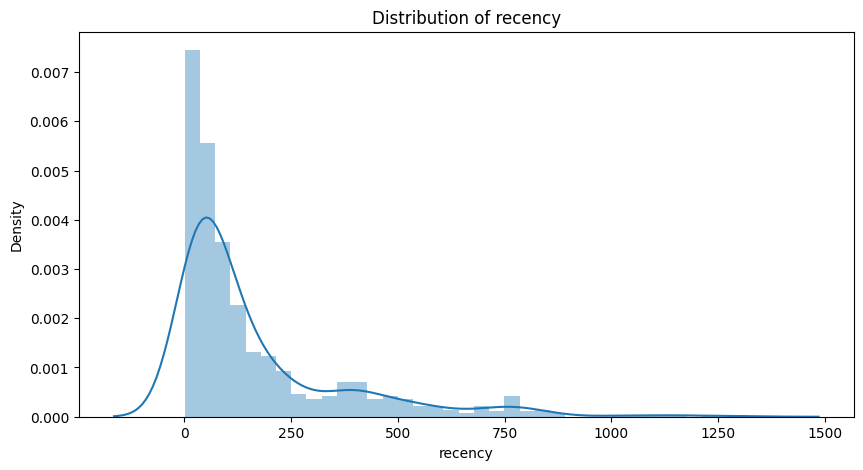

C:\Users\NGUYEN KHANH\AppData\Local\Temp\ipykernel_8284\1239850904.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


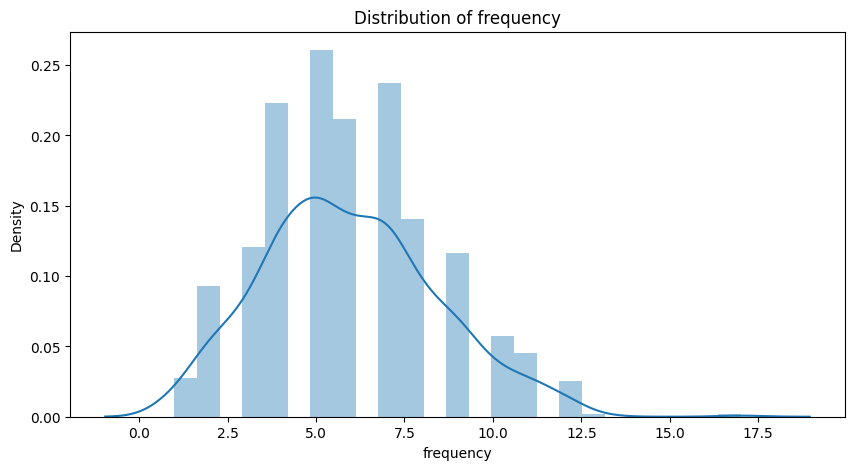

C:\Users\NGUYEN KHANH\AppData\Local\Temp\ipykernel_8284\1239850904.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


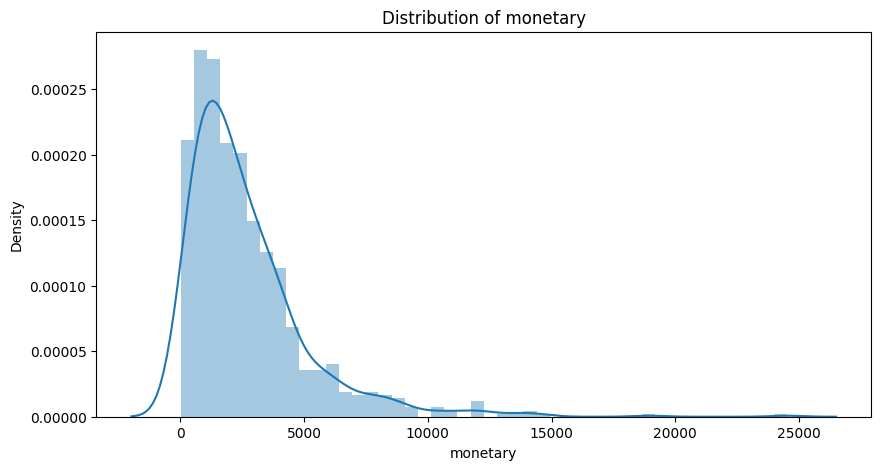

In [38]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(joined[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [39]:
grp = joined.groupby('segment').agg({'customer_id': 'count',
                                     'monetary': 'sum',
                                     'recency': 'mean'}).reset_index()
grp.columns = ['segment', 'cust_count', 'total_monetary', 'avg_recency']
grp.sort_values(by='cust_count', ascending=False, inplace=True)
grp

,segment,cust_count,total_monetary,avg_recency
9,Potential Loyalist,113,190944.9303,45.185841
1,At Risk,96,385996.8861,259.041667
4,Hibernating customers,90,109960.2510,190.044444
5,Lost customers,83,54264.2255,557.963855
7,Need Attention,72,259412.3922,50.138889
3,Champions,71,382096.5868,28.521127
10,Promising,63,224803.8955,35.253968
6,Loyal,62,270680.2154,60.725806
8,New Customers,61,40997.1410,41.475410
0,About To Sleep,44,47310.1172,135.204545


In [40]:
grp['count_share'] = grp['cust_count'] / grp['cust_count'].sum()
grp['monetary_share'] = grp['total_monetary'] / grp['total_monetary'].sum()
grp

,segment,cust_count,total_monetary,avg_recency,count_share,monetary_share
9,Potential Loyalist,113,190944.9303,45.185841,0.142857,0.090209
1,At Risk,96,385996.8861,259.041667,0.121365,0.182358
4,Hibernating customers,90,109960.2510,190.044444,0.113780,0.051949
5,Lost customers,83,54264.2255,557.963855,0.104930,0.025636
7,Need Attention,72,259412.3922,50.138889,0.091024,0.122555
3,Champions,71,382096.5868,28.521127,0.089760,0.180516
10,Promising,63,224803.8955,35.253968,0.079646,0.106205
6,Loyal,62,270680.2154,60.725806,0.078382,0.127879
8,New Customers,61,40997.1410,41.475410,0.077118,0.019368
0,About To Sleep,44,47310.1172,135.204545,0.055626,0.022351


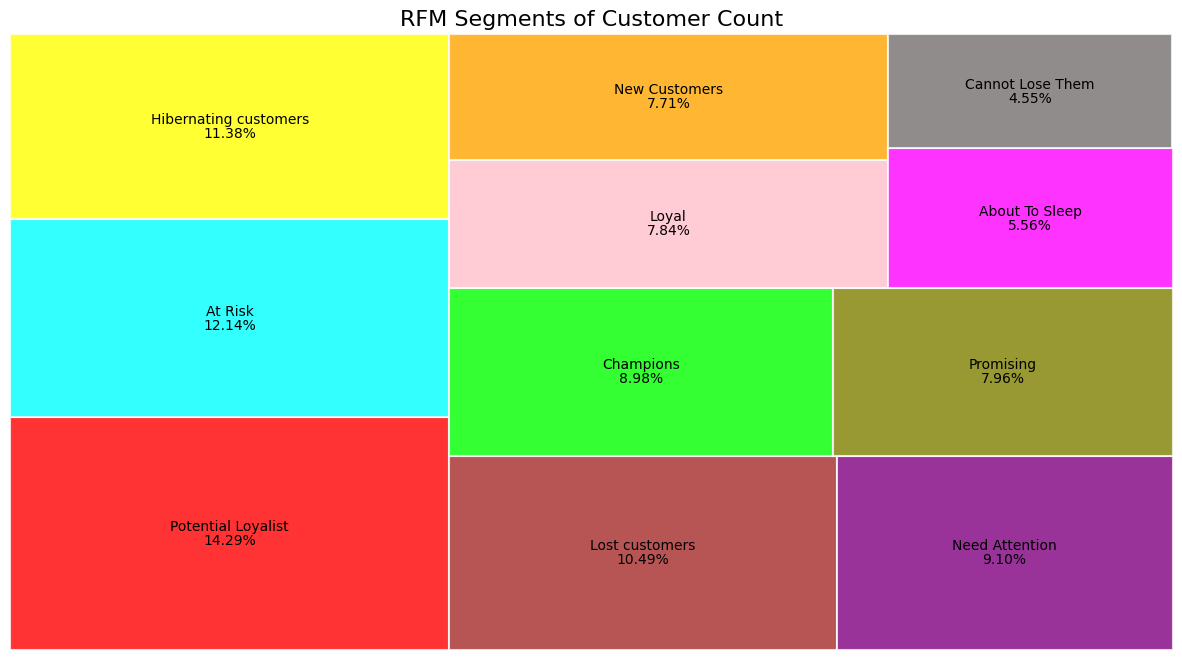

In [41]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['cust_count'], 
              label=grp['segment'],
              value=[f'{x*100:.2f}%' for x in grp['count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

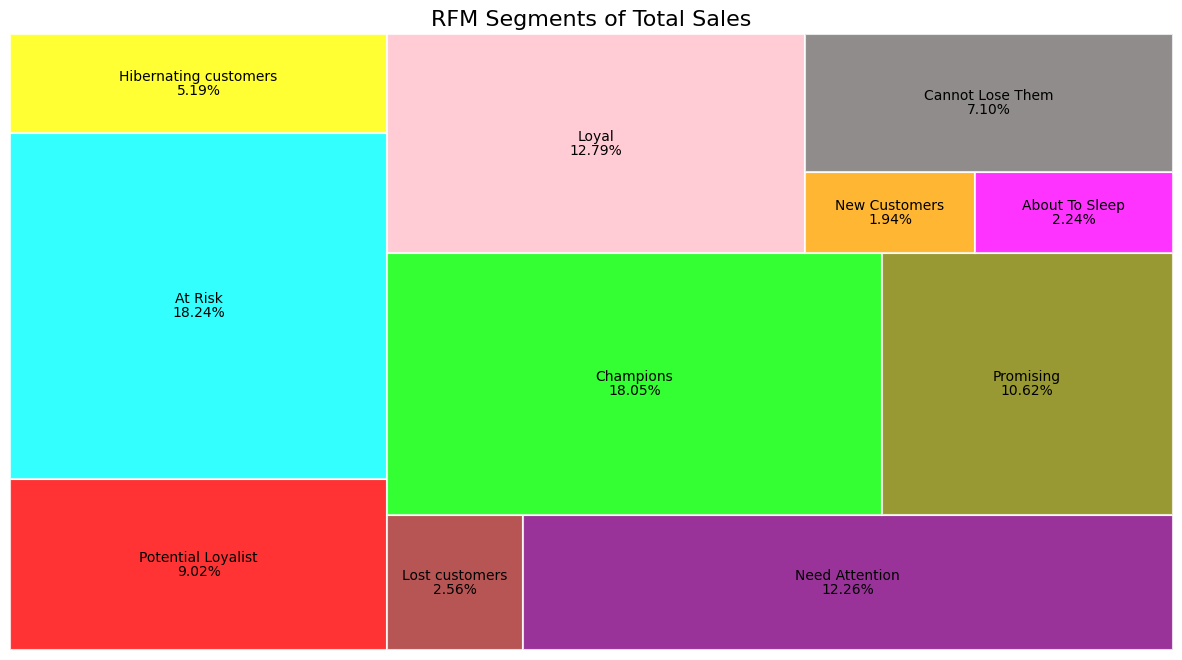

In [42]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['monetary_share'], 
              label=grp['segment'],
              value=[f'{x*100:.2f}%' for x in grp['monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()